In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import opendatasets as od

### Load in the data from Kaggle's website

In [5]:
dataset_url = "https://www.kaggle.com/datasnaek/chess"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: christianmeinzen
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 2.77M/2.77M [00:00<00:00, 14.1MB/s]

In [7]:
df = pd.read_csv("./chess/games.csv")
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


### Preprocess the data before analysis and visualization

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [9]:
chess_df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [10]:
# The "moves" column will also be dropped because we already have the opening name
chess_df.drop(["id", "created_at","last_move_at", "white_id", "black_id", "moves", "opening_eco", "opening_ply"], inplace=True, axis=1)

# Renaming increment_code to time_control
chess_df.rename(columns = {"increment_code":"time_control"}, inplace = True) 

In [11]:
chess_rated = chess_df.rated == True

In [12]:
chess_rated_df = chess_df[chess_rated]
chess_rated_df

,rated,turns,victory_status,winner,time_control,white_rating,black_rating,opening_name
1,True,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
2,True,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation
3,True,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
4,True,95,mate,white,30+3,1523,1469,Philidor Defense
6,True,33,resign,white,10+0,1520,1423,Blackmar-Diemer Gambit: Pietrowsky Defense
...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10+10,1691,1220,Dutch Defense
20054,True,82,mate,black,10+0,1233,1196,Queen's Pawn
20055,True,35,mate,white,10+0,1219,1286,Queen's Pawn Game: Mason Attack
20056,True,109,resign,white,10+0,1360,1227,Pirc Defense


### Visulalization and Analysis

In [13]:
# Changing visualization parameters for my own interest
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.facecolor'] = '#00000000'
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9,
                              10, 12, 13, 15,
                              17, 18, 20 ]))

In [14]:
chess_rated_games = chess_rated_df.shape[0]
chess_rated_and_unrated_games = chess_df.shape[0]
chess_unrated_games = chess_rated_and_unrated_games - chess_rated_games

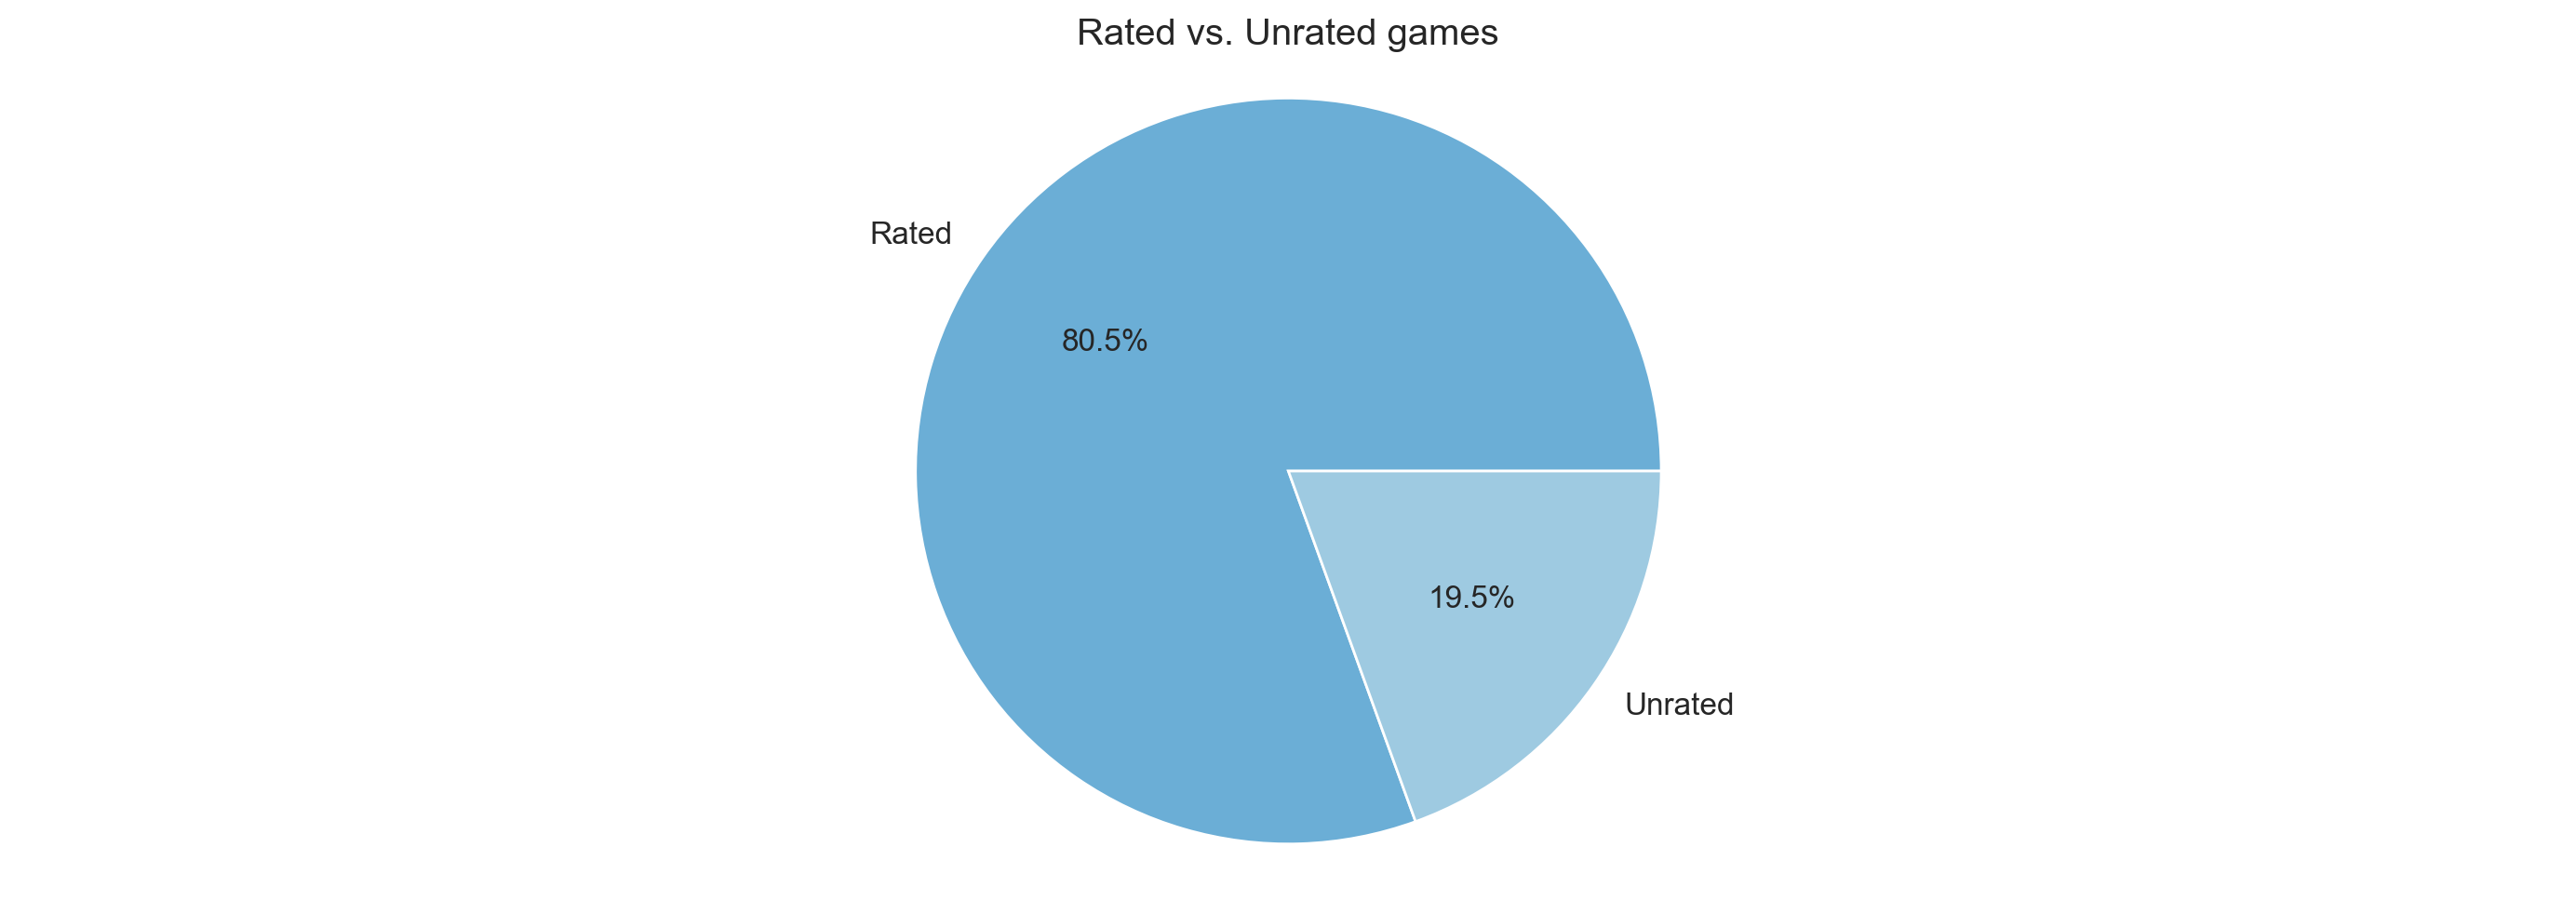

In [15]:
labels = ["Rated", "Unrated"]
variables = [chess_rated_games, chess_unrated_games]

plt.figure(figsize =(14, 5), dpi=200)
plt.title("Rated vs. Unrated games")
plt.pie(variables, labels=labels, autopct='%1.1f%%', colors = inner_colors)
plt.axis('equal')
plt.tight_layout();

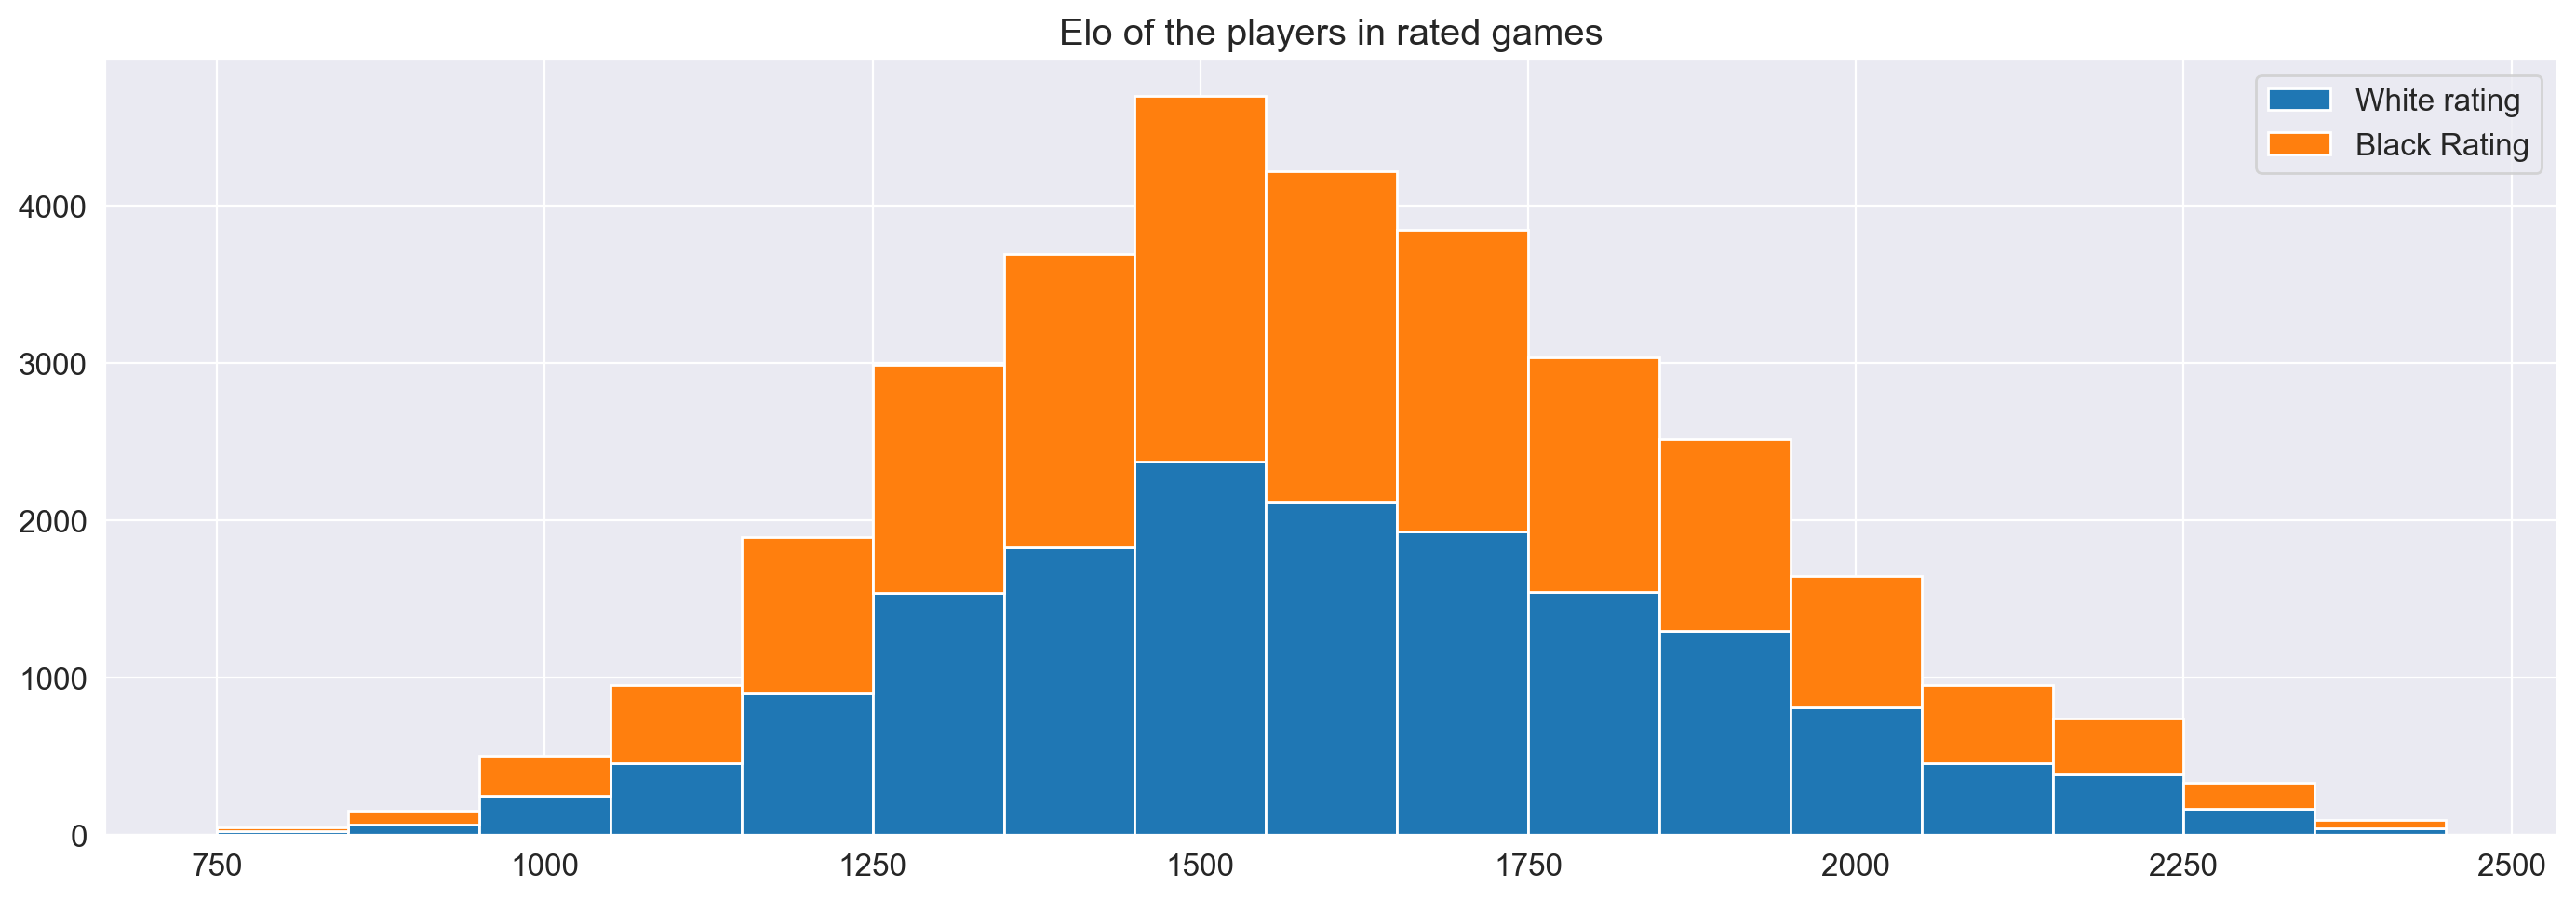

In [16]:
plt.figure(figsize =(14, 5), dpi=200)
plt.title("Elo of the players in rated games")
plt.hist([chess_rated_df.white_rating, chess_rated_df.black_rating], 
         stacked=True, bins= np.arange(750, 2500, 100))
plt.legend(["White rating", "Black Rating"])
plt.tight_layout();

In [17]:
chess_rated_openings = chess_rated_df.groupby("opening_name").opening_name.count()
chess_rated_openings_df = chess_rated_openings.to_frame()

chess_rated_openings_df.rename(columns={ chess_rated_openings_df.columns[0]: "number_of_times_played"}, inplace = True)
chess_rated_openings_df

,number_of_times_played
opening_name,
Alekhine Defense,38
Alekhine Defense #2,3
Alekhine Defense #3,1
Alekhine Defense: Balogh Variation,1
Alekhine Defense: Brooklyn Variation,2
...,...
Zukertort Opening: Sicilian Invitation,29
Zukertort Opening: Slav Invitation,8
Zukertort Opening: Tennison Gambit,36


In [18]:
chess_rated_openings_sorted_df = chess_rated_openings_df.sort_values("number_of_times_played", ascending=False).head(10)
chess_rated_openings_sorted_df

,number_of_times_played
opening_name,
Van't Kruijs Opening,308
Sicilian Defense,283
Sicilian Defense: Bowdler Attack,248
French Defense: Knight Variation,229
Scotch Game,219
Scandinavian Defense: Mieses-Kotroc Variation,207
Queen's Pawn Game: Mason Attack,187
Scandinavian Defense,186
Horwitz Defense,184


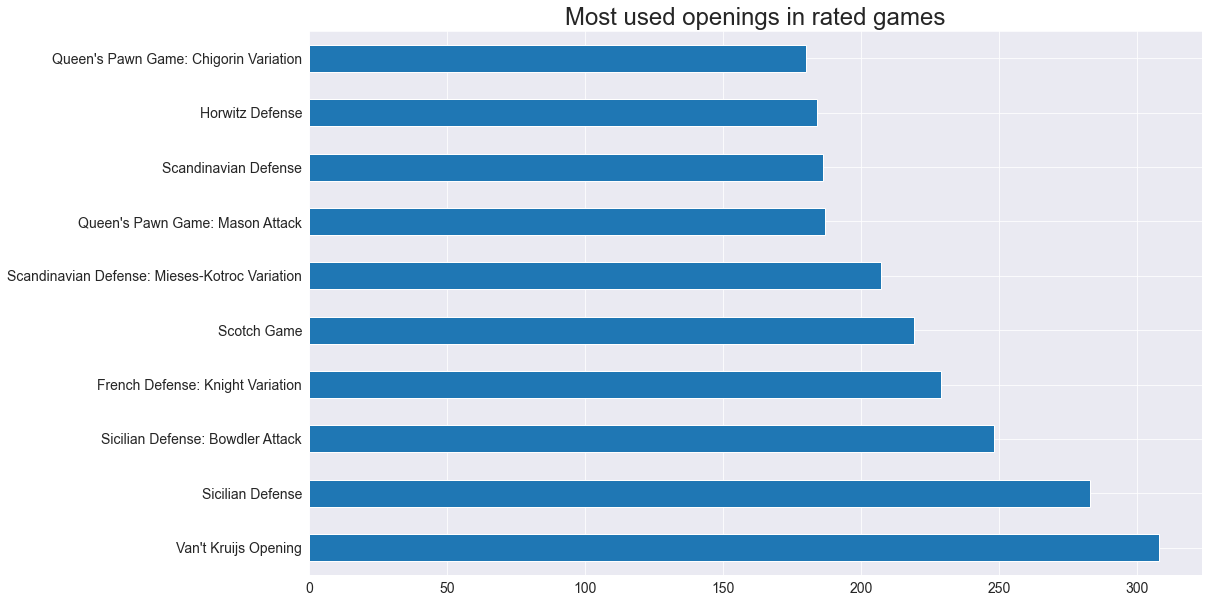

In [19]:
matplotlib.rcParams['font.size'] = 20
chess_rated_openings_sorted_df.plot(kind="barh", 
                                    legend=False, 
                                    title = "Most used openings in rated games", 
                                    figsize = (16,10), 
                                    xlabel = "", 
                                    fontsize = 14);

In [20]:
chess_rated_time_control = chess_rated_df.groupby("time_control").time_control.count()
chess_rated_time_control_df = chess_rated_time_control.to_frame()
chess_rated_time_control_df

chess_rated_time_control_df.rename(columns={ chess_rated_time_control_df.columns[0]: "number_of_times_played"}, inplace = True)
chess_rated_time_control_df

,number_of_times_played
time_control,
0+12,5
0+13,1
0+15,6
0+16,15
0+20,1
...,...
90+0,9
90+120,1
90+30,12


In [21]:
chess_rated_time_control_df = chess_rated_time_control_df.sort_values("number_of_times_played", ascending=False).head(10)
chess_rated_time_control_df

,number_of_times_played
time_control,
10+0,6817
15+0,961
15+15,722
5+5,570
5+8,523
8+0,506
10+5,434
15+10,351
20+0,291


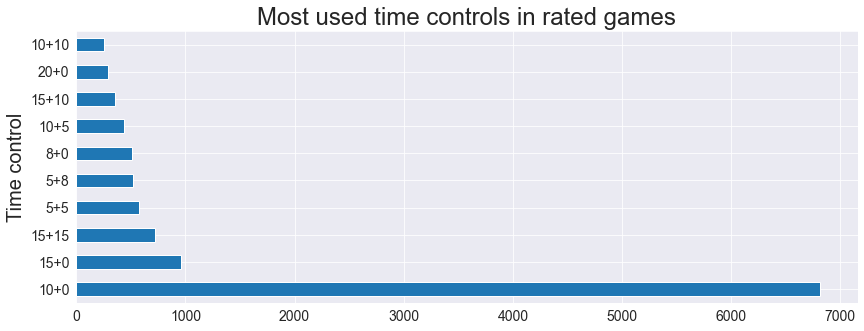

In [22]:
chess_rated_time_control_df.plot(kind="barh", 
                                 legend=False, 
                                 title = "Most used time controls in rated games", 
                                 figsize = (14,5), 
                                 xlabel = "Time control", 
                                 fontsize = 14);

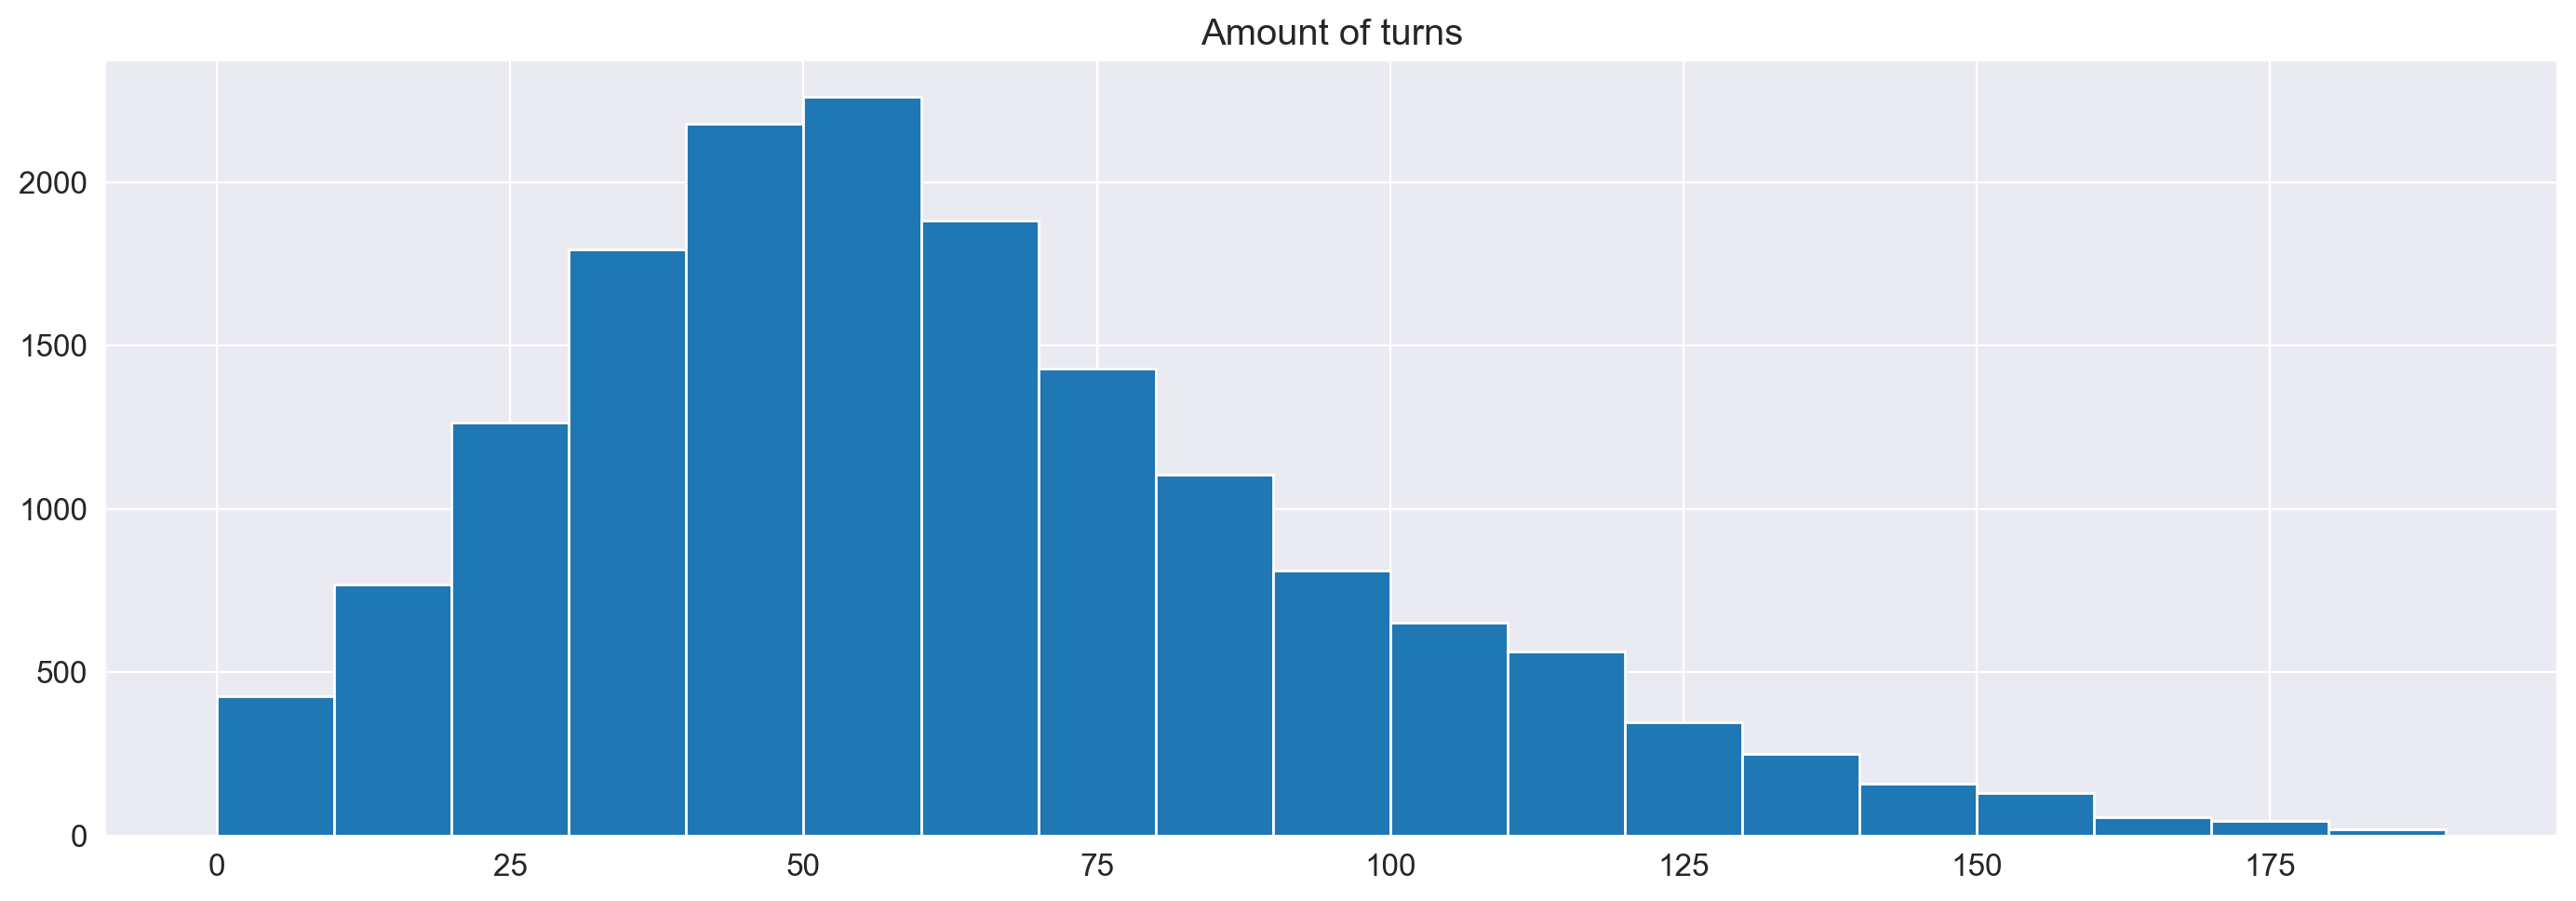

In [23]:
matplotlib.rcParams['font.size'] = 12
plt.figure(figsize =(14, 5), dpi=200)
plt.title('Amount of turns')
plt.hist(chess_rated_df.turns, bins=np.arange(0, 200, 10))
plt.tight_layout();

In [24]:
chess_rated_df

,rated,turns,victory_status,winner,time_control,white_rating,black_rating,opening_name
1,True,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
2,True,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation
3,True,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
4,True,95,mate,white,30+3,1523,1469,Philidor Defense
6,True,33,resign,white,10+0,1520,1423,Blackmar-Diemer Gambit: Pietrowsky Defense
...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10+10,1691,1220,Dutch Defense
20054,True,82,mate,black,10+0,1233,1196,Queen's Pawn
20055,True,35,mate,white,10+0,1219,1286,Queen's Pawn Game: Mason Attack
20056,True,109,resign,white,10+0,1360,1227,Pirc Defense


In [25]:
chess_rated_winner = chess_rated_df.groupby("winner").winner.count()
chess_rated_winner_df = chess_rated_winner.to_frame()

chess_rated_winner_df.rename(columns={ chess_rated_winner_df.columns[0]: "number_of_times"}, inplace = True)
chess_rated_winner_df

,number_of_times
winner,
black,7384
draw,719
white,8052


In [26]:
black_wins = chess_rated_winner_df.number_of_times[0]
white_wins = chess_rated_winner_df.number_of_times[2]
draws = chess_rated_winner_df.number_of_times[1]
total_matches = white_wins + black_wins + draws

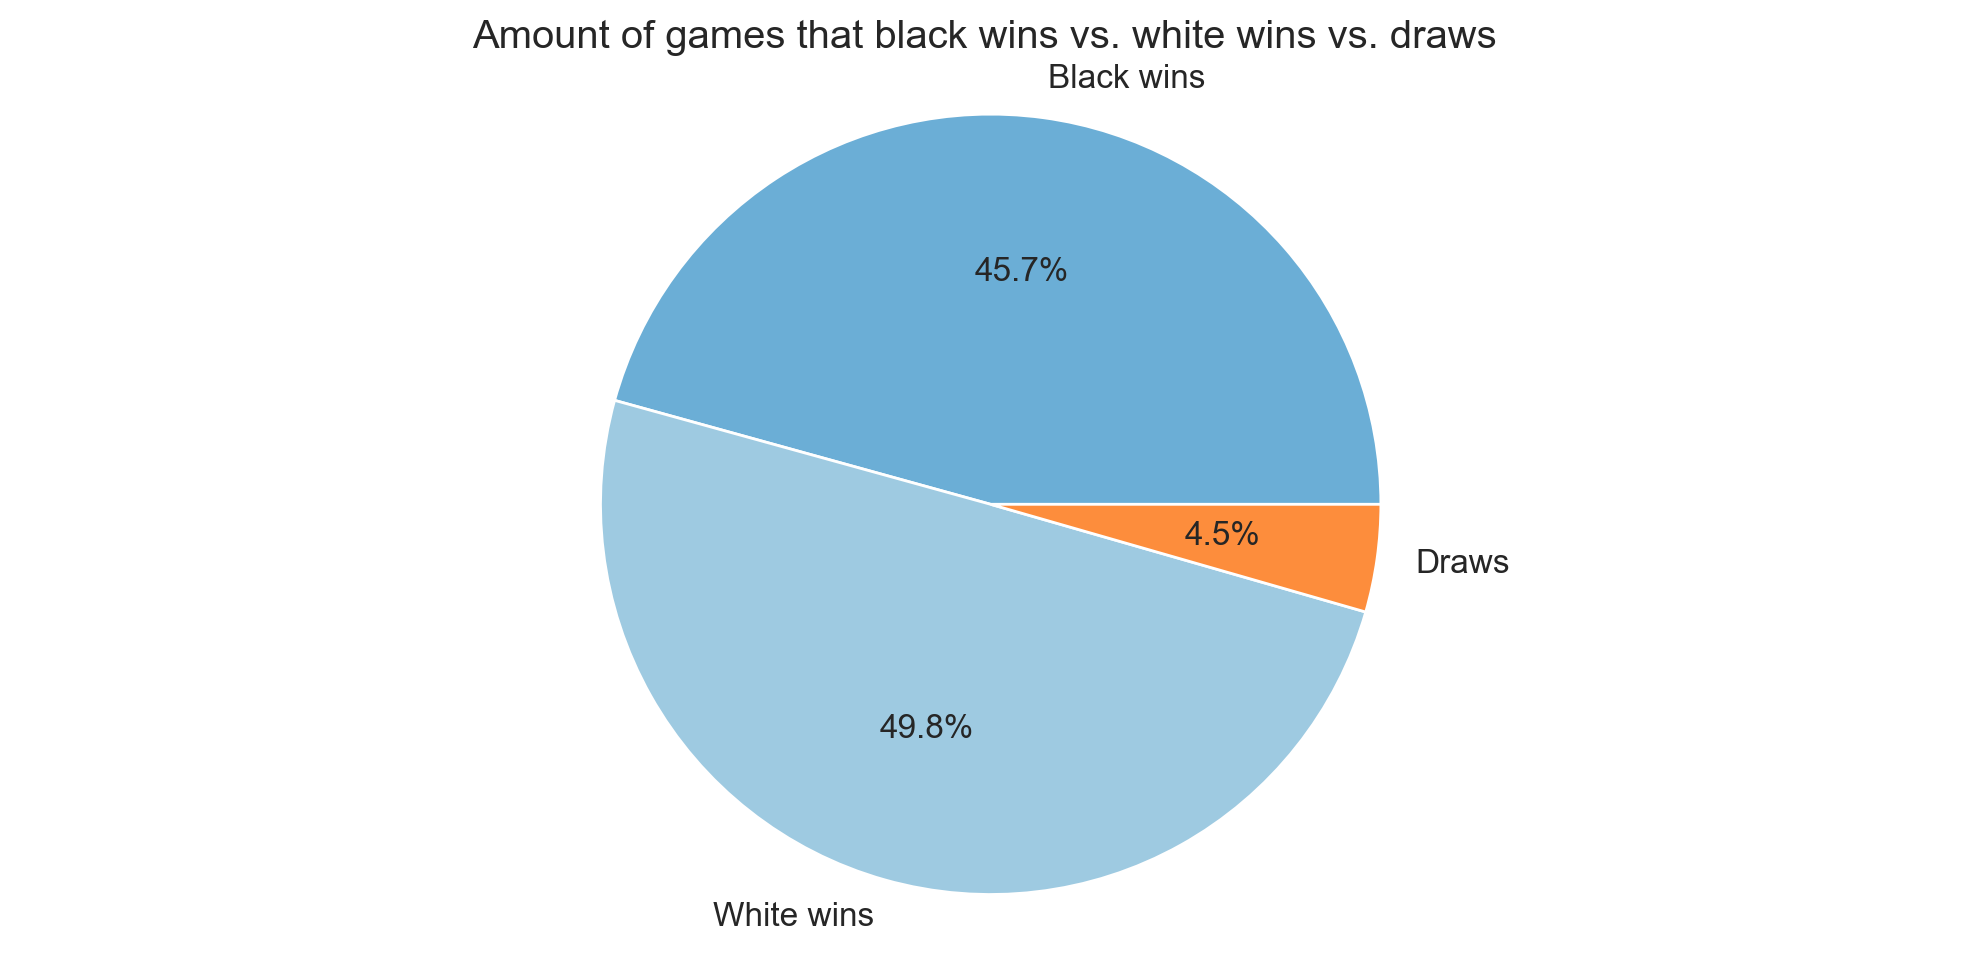

In [27]:
labels = ["Black wins", "White wins", "Draws"]
variables = [black_wins, white_wins, draws]

plt.figure(figsize =(10, 5), dpi=200)
plt.title("Amount of games that black wins vs. white wins vs. draws")
plt.pie(variables, labels=labels, autopct='%1.1f%%', colors = inner_colors)
plt.axis('equal')
plt.tight_layout();

In [28]:
chess_rated_victory_status = chess_rated_df.groupby("victory_status").victory_status.count()
chess_rated_victory_status_df = chess_rated_victory_status.to_frame()

chess_rated_victory_status_df.rename(columns={ chess_rated_victory_status_df.columns[0]: "number_of_times"}, inplace = True)
chess_rated_victory_status_df

,number_of_times
victory_status,
draw,681
mate,5146
outoftime,1359
resign,8969


In [29]:
draws_victory_status = chess_rated_victory_status_df.number_of_times[0]
mates = chess_rated_victory_status_df.number_of_times[1]
out_of_time = chess_rated_victory_status_df.number_of_times[2]
resign = chess_rated_victory_status_df.number_of_times[3]

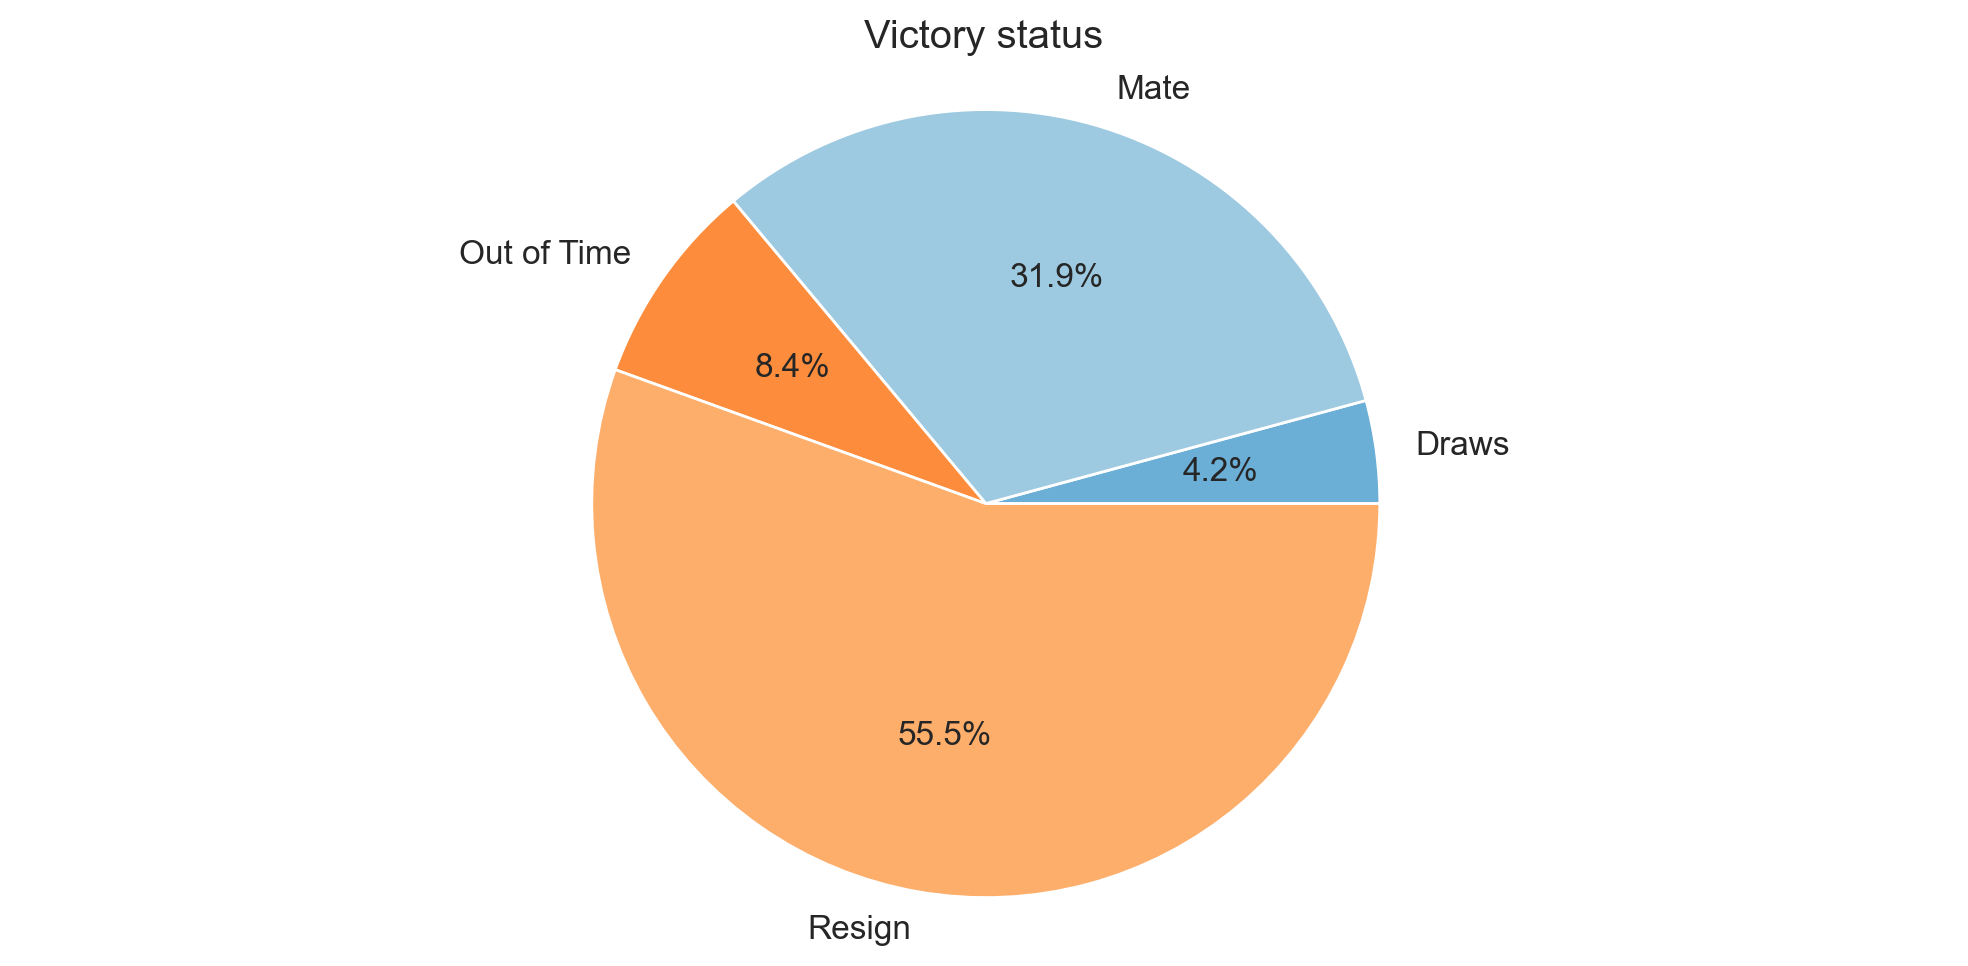

In [30]:
labels = ["Draws", "Mate", "Out of Time", "Resign"]
variables = [draws_victory_status, mates, out_of_time, resign]

plt.figure(figsize =(10, 5), dpi=200)
plt.title("Victory status")
plt.pie(variables, labels=labels, autopct='%1.1f%%', colors = inner_colors)
plt.axis('equal')
plt.tight_layout();

Of all the games played, 80.5% were Rated games, while the other 19.5% were unrated.

The ELO (rating) of the players in the dataset appears to be mainly between the 1400 to 1700 range.

Most games have a number of turns that range from 40 to 60 turns.

Of the 16.155 rated games, black won 7384 (45.7%), white won 8052 (49.8%) and 719 were draws (4.5%).

The openings used in the games of this dataset are varied, although the most used one was the Van't Kruijs Opening, where white starts with 1. e3; followed by the Sicilian Defense, where white starts with 1.e4 and black responds with c5, preventing white from taking the whole centre with d4.

Although Van't Kruijs Opening was the most played, I believe that that is because it is only one move (with no variations included in the opening name itself), where openings that star with 1. e4 or 1. d4 usually have different lines.
Of the time controls used, 10+0 (10 minutes without increments) was the most played, with 6.817 plays, being a "Rapid" time control.

When it comes to how the match ends, 8.969 games ended by the opponent resigning (55.5%), 5.146 ended with a checkmate (31.9%), 1.359 ended by flagging (running out of time)(8.4%), and 681 were draws (4.2%).